## Dimensionality reduction

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

import sklearn

In [2]:
df = pd.read_csv('mushrooms.csv')
df

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


In [3]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
scaler = StandardScaler()
le = LabelEncoder()
x = df.drop(['class'], axis=1)
y = df['class']

for c in x.columns:
    x[c] = le.fit_transform(x[c])
y = le.fit_transform(y)
    
scaler.fit(x)
scaled_x = scaler.transform(x)
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
x_pca = pca.fit_transform(scaled_x)

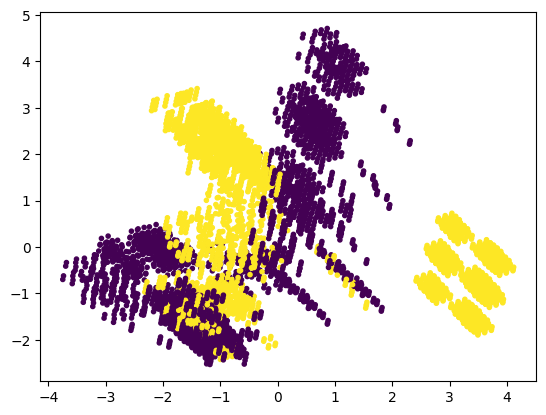

In [4]:
plt.scatter(x_pca[:,0], x_pca[:,1], c=y, marker='.')

In [5]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, verbose=1)
x_tsne = tsne.fit_transform(scaled_x)

x_tsne

c:\users\michael\appdata\local\programs\python\python39\lib\site-packages\sklearn\manifold\_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
c:\users\michael\appdata\local\programs\python\python39\lib\site-packages\sklearn\manifold\_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 8124 samples in 0.001s...
[t-SNE] Computed neighbors for 8124 samples in 0.470s...
[t-SNE] Computed conditional probabilities for sample 1000 / 8124
[t-SNE] Computed conditional probabilities for sample 2000 / 8124
[t-SNE] Computed conditional probabilities for sample 3000 / 8124
[t-SNE] Computed conditional probabilities for sample 4000 / 8124
[t-SNE] Computed conditional probabilities for sample 5000 / 8124
[t-SNE] Computed conditional probabilities for sample 6000 / 8124
[t-SNE] Computed conditional probabilities for sample 7000 / 8124
[t-SNE] Computed conditional probabilities for sample 8000 / 8124
[t-SNE] Computed conditional probabilities for sample 8124 / 8124
[t-SNE] Mean sigma: 0.708330
[t-SNE] KL divergence after 250 iterations with early exaggeration: 60.538025
[t-SNE] KL divergence after 1000 iterations: 0.440399


array([[ 64.27531  , -53.141205 ],
       [ 44.45534  ,  44.634872 ],
       [ -5.232015 ,  69.68325  ],
       ...,
       [ 66.28632  ,  -7.3737144],
       [-10.778387 , -92.530556 ],
       [ 66.44599  ,  -9.648666 ]], dtype=float32)

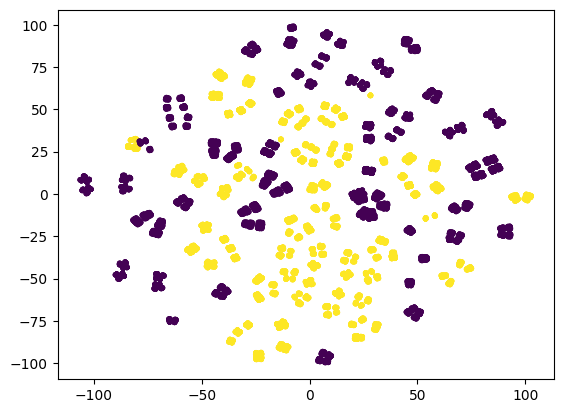

In [6]:
plt.scatter(x_tsne[:,0], x_tsne[:,1], c=y, marker='.')

## Cluster Analysis

In [7]:
from sklearn.cluster import KMeans
from skimage import io
depths = [64, 32, 16, 8]
img = io.imread('image.jpg')
img = np.array(img, dtype=np.float64) / 255

In [8]:
w, h, d = original_shape = tuple(img.shape)
image_array = np.reshape(img, (w * h, d))

In [9]:
from sklearn.utils import shuffle
training = shuffle(image_array, random_state=0, n_samples=1_000)
models = [KMeans(n_clusters=depth, random_state=0) for depth in depths]
[model.fit(training) for model in models]
models

[KMeans(n_clusters=64, random_state=0),
 KMeans(n_clusters=32, random_state=0),
 KMeans(n_clusters=16, random_state=0),
 KMeans(random_state=0)]

In [10]:
predictions = [model.predict(image_array) for model in models]
predictions

[array([44, 44, 57, ..., 25, 16, 16]),
 array([23, 23, 23, ..., 12, 17, 17]),
 array([15, 15, 15, ...,  1,  9,  9]),
 array([7, 2, 2, ..., 1, 1, 1])]

In [11]:
def recreate(codebook, labels, w, h):
    return codebook[labels].reshape(w, h, -1)


In [12]:
imgs = [recreate(models[i].cluster_centers_, predictions[i], w, h) for i in range(len(models))]
imgs

[array([[[0.27941176, 0.12156863, 0.08235294],
         [0.27941176, 0.12156863, 0.08235294],
         [0.14457516, 0.09019608, 0.05071895],
         ...,
         [0.0728004 , 0.08878834, 0.06576169],
         [0.0728004 , 0.08878834, 0.06576169],
         [0.02507003, 0.03032213, 0.02289916]],
 
        [[0.27941176, 0.12156863, 0.08235294],
         [0.27941176, 0.12156863, 0.08235294],
         [0.27941176, 0.12156863, 0.08235294],
         ...,
         [0.0728004 , 0.08878834, 0.06576169],
         [0.04117647, 0.06097407, 0.04067046],
         [0.0054902 , 0.00987313, 0.00461361]],
 
        [[0.27941176, 0.12156863, 0.08235294],
         [0.27941176, 0.12156863, 0.08235294],
         [0.27941176, 0.12156863, 0.08235294],
         ...,
         [0.04117647, 0.06097407, 0.04067046],
         [0.0054902 , 0.00987313, 0.00461361],
         [0.0054902 , 0.00987313, 0.00461361]],
 
        ...,
 
        [[0.08893557, 0.12282913, 0.08893557],
         [0.08893557, 0.12282913, 0.08893

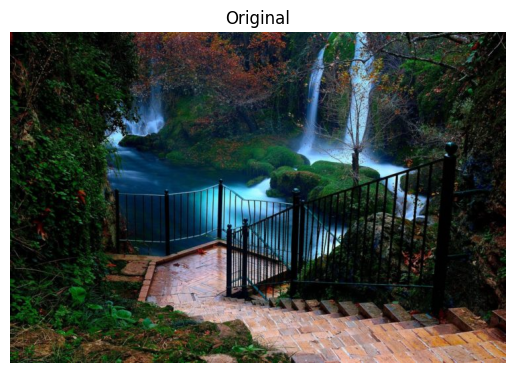

In [13]:
plt.title("Original")
plt.axis("off")
plt.imshow(img)

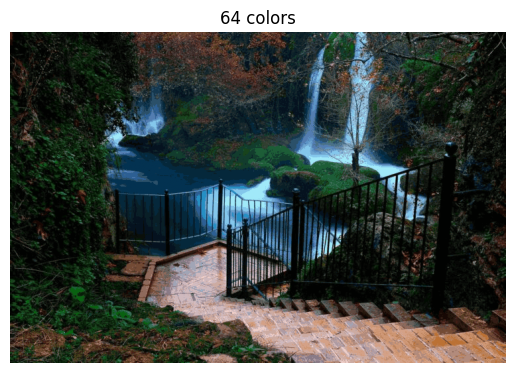

In [14]:
plt.title("64 colors")
plt.axis("off")
plt.imshow(imgs[0])

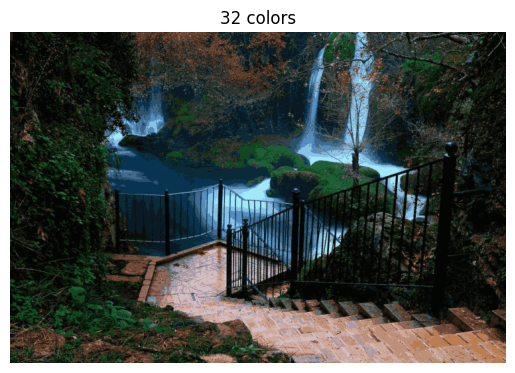

In [15]:
plt.title("32 colors")
plt.axis("off")
plt.imshow(imgs[1])

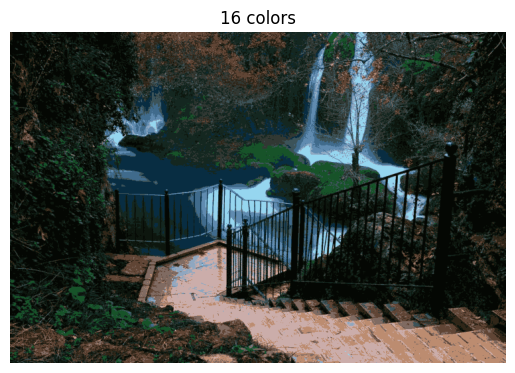

In [16]:
plt.title("16 colors")
plt.axis("off")
plt.imshow(imgs[2])

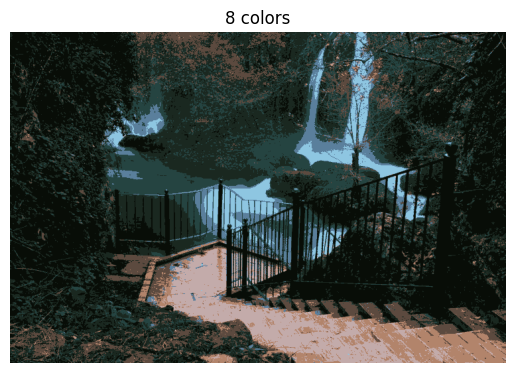

In [17]:
plt.title("8 colors")
plt.axis("off")
plt.imshow(imgs[3])

## Text data classification

In [18]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

In [19]:
raw_df = pd.read_csv('nlp/dataset.csv')
raw_df

,Text,Language,Label
0,@Charlie_Corley @Kristine1G @amyklobuchar @Sty...,en,litigious
1,#BadBunny: Como dos gotas de agua: Joven se di...,es,negative
2,https://t.co/YJNiO0p1JV Flagstar Bank disclose...,en,litigious
3,Rwanda is set to host the headquarters of Unit...,en,positive
4,OOPS. I typed her name incorrectly (today’s br...,en,litigious
...,...,...,...
937849,@Juice_Lemons in the dark. it’s so good,en,positive
937850,8.SSR &amp; Disha Salian case should be solved...,en,negative
937851,*ACCIDENT: Damage Only* - Raleigh Fire Depart...,en,negative
937852,@reblavoie So happy for her! She’s been incred...,en,positive


In [20]:
df = raw_df
df = df.drop(df[df['Language'] != 'en'].index)
df = df.drop(df[df['Label'] == 'litigious'].index)
df = df.drop(df[df['Label'] == 'uncertainty'].index)
df = df.drop(['Language'], axis=1)
df = df[:1000]
df

,Text,Label
3,Rwanda is set to host the headquarters of Unit...,positive
5,It sucks for me since I'm focused on the natur...,negative
8,Social Security. Constant political crises dis...,negative
9,@FilmThePoliceLA A broken rib can puncture a l...,negative
10,@jacobringenwald @aKeithWatts @CountDankulaTV ...,negative
...,...,...
1801,@JudiciaryGOP @RepJerryNadler Gym has somethin...,negative
1802,Big Tech remains silent on questions about dat...,negative
1806,@piaroos1 @moa_roos I think your snuggle cuddl...,positive
1808,@BeingtheThe @cocohunnie @tmoneybrown @DanRath...,negative


In [21]:
import re, string
def preprocess_text(text):
    text = text.lower()
    text = re.sub('[@#]\S+', ' ', text)
    text = re.sub('http\S+', ' ', text)
    text = re.sub('\d', ' ', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), ' ', text)
    
    emoj = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002500-\U00002BEF"  # chinese char
        u"\U00002702-\U000027B0"
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u"\U00010000-\U0010ffff"
        u"\u2640-\u2642" 
        u"\u2600-\u2B55"
        u"\u200d"
        u"\u23cf"
        u"\u23e9"
        u"\u231a"
        u"\ufe0f"  # dingbats
        u"\u3030"
                      "]+", re.UNICODE)
    text = re.sub(emoj, ' ', text)
    text = re.sub('\s{2,}', " ", text)
    tokens = word_tokenize(text)
    return [token for token in tokens if (token not in stopwords.words('english'))]

    

In [22]:
positive = df[df['Label']=='positive']['Text']
positive_words = []
for text in positive:
    positive_words+=preprocess_text(text)
positive_words

['rwanda',
 'set',
 'host',
 'headquarters',
 'united',
 'nations',
 'development',
 'programme',
 '’',
 'undp',
 'new',
 'innovation',
 'financing',
 'facility',
 'find',
 'wimbledon',
 'nick',
 'kyrgios',
 'admits',
 'spitting',
 'towards',
 'disrespectful',
 'spectator',
 'beating',
 'paul',
 'jubb',
 'good',
 'grief',
 '‼',
 '‼',
 'class',
 '’',
 'he…',
 'booktwt',
 'thing',
 'thats',
 'speaks',
 'perfect',
 'grammar',
 'spellinc',
 'punctuation',
 'capitalization',
 'everyones',
 'favlrite',
 'moot',
 'end',
 'consume',
 'fictional',
 'stories',
 'enjoy',
 'seem',
 'fair',
 'personally',
 'love',
 'seeing',
 'characters',
 'going',
 'trough',
 'lowest',
 'much',
 'highest',
 'fucked',
 'stuff',
 'spoil',
 'enjoyment',
 'though',
 'dreams',
 'last',
 'chapters',
 'express',
 'coach',
 'ac',
 'working',
 'properly',
 'prayagraj',
 'ltt',
 'passengers',
 'sweating',
 'food',
 'unimpressive',
 'please',
 'improve',
 'standards',
 'people',
 'wu',
 'think',
 'rude',
 'complain',
 'serv

In [23]:
negative = df[df['Label']=='negative']['Text']
negative_words = []
for text in negative:
    negative_words+=preprocess_text(text)
negative_words

['sucks',
 'since',
 'focused',
 'nature',
 'aspect',
 'things',
 'environmental',
 'problems',
 'roots',
 'social',
 'economic',
 'amp',
 'political',
 'issues',
 'simply',
 'recycling',
 'using',
 'renewable',
 'energy',
 'like',
 'fixing',
 'top',
 'floor',
 'building',
 'unsteady',
 'foundation',
 'social',
 'security',
 'constant',
 'political',
 'crises',
 'distract',
 'masses',
 'rob',
 'us',
 'blind',
 'meantime',
 'coming',
 'american',
 'people',
 'breathtaking',
 'speed',
 'amp',
 'every',
 'direction',
 'til',
 'people',
 'know',
 'look',
 'first',
 'accident',
 'broken',
 'rib',
 'puncture',
 'lung',
 'lead',
 'collapsed',
 'lung',
 'much',
 'longer',
 'recoveries',
 'break',
 'get',
 'checked',
 'agree',
 'flawed',
 'response',
 'small',
 'many',
 'pl',
 'people',
 'presume',
 'would',
 'agree',
 'nuance',
 'amp',
 'understanding',
 'needed',
 'cases',
 'good',
 'starting',
 'point',
 'drink',
 'amp',
 'drive',
 'play',
 'guns',
 'sound',
 'advice',
 'sounds',
 'simplisti

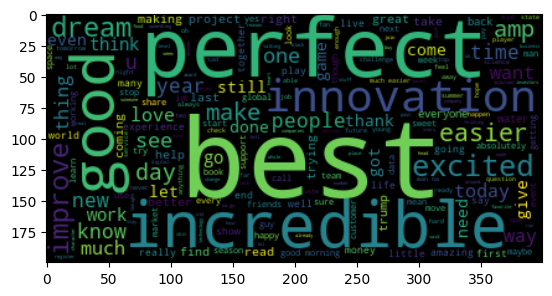

In [24]:
from wordcloud import WordCloud
wordcloud_pos = WordCloud().generate(' '.join(positive_words))
wordcloud_neg = WordCloud().generate(' '.join(negative_words))
plt.imshow(wordcloud_pos, interpolation='bilinear')

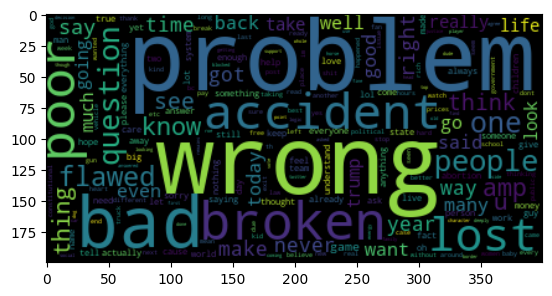

In [25]:
plt.imshow(wordcloud_neg, interpolation='bilinear')

In [26]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
tfidf_vectorizer = TfidfVectorizer(max_df=500, min_df=10)
preprocessed_texts = [' '.join(preprocess_text(t)) for t in df['Text']]
df2 = df
df2['Text'] = preprocessed_texts
df2

,Text,Label
3,rwanda set host headquarters united nations de...,positive
5,sucks since focused nature aspect things envir...,negative
8,social security constant political crises dist...,negative
9,broken rib puncture lung lead collapsed lung m...,negative
10,agree flawed response small many pl people pre...,negative
...,...,...
1801,gym something seriously wrong w ohio fuck thin...,negative
1802,big tech remains silent questions data privacy...,negative
1806,think snuggle cuddle time already dream cloud ...,positive
1808,wrong dude suv type partition like limo get fa...,negative


In [27]:
train_data, train_classes, test_data, test_classes = df2[:500]['Text'], df2[:500]['Label'], df2[500:]['Text'], df2[500:]['Label']

tfidf_train = tfidf_vectorizer.fit_transform(train_data)
tfidf_test =  tfidf_vectorizer.transform(test_data)

clf = LogisticRegression().fit(tfidf_train, train_classes)
clf

LogisticRegression()

In [28]:
from sklearn.metrics import classification_report,confusion_matrix
predicted = clf.predict(tfidf_test)
print(classification_report(test_classes, predicted))

              precision    recall  f1-score   support

    negative       0.96      0.99      0.97       240
    positive       0.99      0.96      0.97       260

    accuracy                           0.97       500
   macro avg       0.97      0.97      0.97       500
weighted avg       0.97      0.97      0.97       500

